In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
'importar datos'
data = pd.read_csv("data/datafinal1.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Columns: 124 entries, Unnamed: 0 to Fossil fuel energy consumption (% of total energy consumption)
dtypes: float64(120), int64(2), object(2)
memory usage: 988.2+ KB


In [4]:
data_variables = data.drop(['Unnamed: 0','country_code','country_name','year'],axis=1)

In [4]:
#data_variables = data.iloc[:,[9,10,11,12,17,18,26,41,42,43,44,61,62,63,74,98]]

In [5]:
data_variables.describe()

,Median age (years),"Net migration rate (per 1,000 people)",Population with at least some secondary education (% ages 25 and older),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)","Mean years of schooling, female (years)","Mean years of schooling, male (years)",Share of seats in parliament (% held by women),"Adolescent birth rate (births per 1,000 women ages 15-19)",Vulnerable employment (% of total employment),...,"Suicide rate, female (per 100,000 people)",Ratio of education and health expenditure to military expenditure,Current health expenditure (% of GDP),"Age-standarized mortality rate attributed to noncommunicable diseases, female","Age-standarized mortality rate attributed to noncommunicable diseases, male","Carbon dioxide emissions, per capita (tonnes)",Carbon dioxide emissions (kg per 2010 US$ of GDP),"Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),Fossil fuel energy consumption (% of total energy consumption)
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.00000,1020.000000
mean,26.141275,-0.367843,44.580686,42.797255,48.062157,6.322353,7.120490,12.084020,66.402451,40.697255,...,2.857549,12.969706,4.016863,265.165588,344.995490,2.645686,0.140725,239.824510,35.01000,45.561471
std,8.276693,10.581833,30.855459,31.739631,30.890208,3.856039,3.572373,11.477586,50.357713,28.720338,...,4.181654,300.875429,3.548994,291.670032,371.217561,4.836958,0.190808,348.206716,31.25435,39.350261
min,14.400000,-70.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.800000,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,0.000000
25%,18.500000,-3.400000,17.300000,12.750000,22.750000,2.900000,4.700000,0.100000,22.575000,13.175000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.80000,0.000000
50%,24.100000,-0.700000,43.700000,40.600000,46.750000,6.700000,7.400000,10.000000,54.900000,35.400000,...,0.000000,0.000000,4.200000,0.000000,0.000000,0.200000,0.080000,72.500000,26.55000,50.100000
75%,33.600000,1.700000,70.525000,70.600000,74.850000,9.500000,10.000000,19.100000,97.025000,63.225000,...,4.800000,5.625000,6.600000,533.350000,683.900000,3.625000,0.230000,365.000000,60.62500,84.800000
max,46.400000,134.400000,100.000000,100.000000,100.000000,13.700000,14.500000,57.500000,225.100000,94.800000,...,32.100000,9610.400000,20.400000,1243.600000,1362.400000,38.400000,1.880000,2900.000000,98.20000,100.000000


In [6]:
data_norm = (data_variables-data_variables.min())/(data_variables.max()-data_variables.min())

In [7]:
data_norm

,Median age (years),"Net migration rate (per 1,000 people)",Population with at least some secondary education (% ages 25 and older),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)","Mean years of schooling, female (years)","Mean years of schooling, male (years)",Share of seats in parliament (% held by women),"Adolescent birth rate (births per 1,000 women ages 15-19)",Vulnerable employment (% of total employment),...,"Suicide rate, female (per 100,000 people)",Ratio of education and health expenditure to military expenditure,Current health expenditure (% of GDP),"Age-standarized mortality rate attributed to noncommunicable diseases, female","Age-standarized mortality rate attributed to noncommunicable diseases, male","Carbon dioxide emissions, per capita (tonnes)",Carbon dioxide emissions (kg per 2010 US$ of GDP),"Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),Fossil fuel energy consumption (% of total energy consumption)
0,0.043750,0.222710,0.082,0.023,0.136,0.029197,0.172414,0.000000,0.713838,0.956705,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.461512,0.161914,0.000
1,0.050000,0.541423,0.098,0.035,0.157,0.043796,0.220690,0.000000,0.725929,0.964097,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.437349,0.357434,0.000
2,0.034375,0.301657,0.111,0.045,0.170,0.058394,0.255172,0.000000,0.731751,0.965153,...,0.052960,0.000000,0.000000,0.689772,0.732384,0.000000,0.000000,0.378668,0.551935,0.000
3,0.050000,0.376218,0.145,0.063,0.223,0.072993,0.289655,0.450435,0.647559,0.959873,...,0.000000,0.000000,0.485294,0.000000,0.000000,0.000000,0.000000,0.282361,0.416497,0.000
4,0.046875,0.307992,0.182,0.059,0.298,0.087591,0.351724,0.480000,0.587998,0.952482,...,0.065421,0.000645,0.421569,0.664281,0.694363,0.000000,0.000000,0.200552,0.150713,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,0.100000,0.318226,0.368,0.285,0.458,0.343066,0.441379,0.255652,0.451858,0.661035,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153952,0.683299,0.436
1016,0.118750,0.301170,0.459,0.371,0.554,0.408759,0.510345,0.161739,0.440215,0.640971,...,0.305296,0.000000,0.000000,0.499357,0.504624,0.028646,0.228723,0.202623,0.705703,0.370
1017,0.121875,0.288012,0.495,0.405,0.578,0.467153,0.544828,0.361739,0.441558,0.658923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.023438,0.260638,0.216086,0.816701,0.303
1018,0.131250,0.304581,0.527,0.463,0.615,0.510949,0.558621,0.311304,0.489476,0.688490,...,0.345794,0.001457,0.578431,0.498311,0.476806,0.018229,0.244681,0.152917,0.844196,0.249


In [8]:
wcss = []

for i in range (1,11):
  kmeans = KMeans(n_clusters = i, max_iter=300)
  kmeans.fit(data_norm)
  wcss.append(kmeans.inertia_)


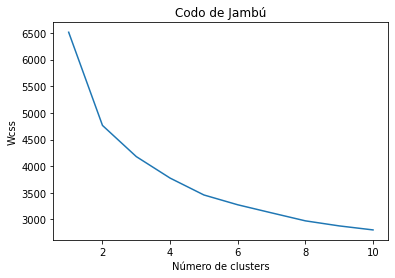

In [9]:
plt.plot(range(1,11),wcss)
plt.title("Codo de Jambú")
plt.xlabel("Número de clusters")
plt.ylabel("Wcss")
plt.show()

In [10]:
clustering = KMeans(n_clusters = 3, max_iter = 300)
clustering.fit(data_norm)

KMeans(n_clusters=3)

In [13]:
data['Kmeans_Clusters'] = clustering.labels_
data.head()

,Unnamed: 0,country_code,country_name,year,Median age (years),"Net migration rate (per 1,000 people)",Population with at least some secondary education (% ages 25 and older),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)","Mean years of schooling, female (years)",...,Ratio of education and health expenditure to military expenditure,Current health expenditure (% of GDP),"Age-standarized mortality rate attributed to noncommunicable diseases, female","Age-standarized mortality rate attributed to noncommunicable diseases, male","Carbon dioxide emissions, per capita (tonnes)",Carbon dioxide emissions (kg per 2010 US$ of GDP),"Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),Fossil fuel energy consumption (% of total energy consumption),Kmeans_Clusters
0,0,AFG,Afghanistan,1990,15.8,-25.1,8.2,2.3,13.6,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1340.0,15.9,0.0,2
1,1,AFG,Afghanistan,1995,16.0,40.3,9.8,3.5,15.7,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,1270.0,35.1,0.0,2
2,2,AFG,Afghanistan,2000,15.5,-8.9,11.1,4.5,17.0,0.8,...,0.0,0.0,857.8,997.8,0.0,0.0,1100.0,54.2,0.0,2
3,3,AFG,Afghanistan,2005,16.0,6.4,14.5,6.3,22.3,1.0,...,0.0,9.9,0.0,0.0,0.0,0.0,821.0,40.9,0.0,2
4,4,AFG,Afghanistan,2010,15.9,-7.6,18.2,5.9,29.8,1.2,...,6.2,8.6,826.1,946.0,0.0,0.0,584.0,14.8,0.0,2


In [36]:
#data.to_csv('dataclustereada.csv')

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(data_norm)
pca_data_df = pd.DataFrame(data = pca_data, columns = ['componente_1','componente_2'])
pca_nombre_datos = pd.concat([pca_data_df, data['Kmeans_Clusters']], axis=1)

pca_nombre_datos


,componente_1,componente_2,Kmeans_Clusters
0,-2.709087,-0.106870,2
1,-2.620583,-0.149993,2
2,-2.240794,0.341078,2
3,-1.810163,0.204903,2
4,-1.056870,1.497181,2
...,...,...,...
1015,-1.530625,-0.084385,2
1016,-1.211549,0.378201,2
1017,-1.404139,0.180581,2
1018,-0.224220,2.153874,2


In [15]:
temp = pd.DataFrame(pca.components_,columns=data_norm.columns,index = ['componente_1','componente_2'])
print(temp)
temp.to_csv('data/pesos.csv')

              Median age (years)  Net migration rate (per 1,000 people)  \
componente_1            0.138556                               0.006687   
componente_2           -0.089026                              -0.003731   

              Population with at least some secondary education (% ages 25 and older)  \
componente_1                                           0.165613                         
componente_2                                          -0.062416                         

              Population with at least some secondary education, female (% ages 25 and older)  \
componente_1                                           0.172115                                 
componente_2                                          -0.073207                                 

              Population with at least some secondary education, male (% ages 25 and older)  \
componente_1                                           0.161234                               
componente_2            

In [37]:
#pca_nombre_datos.to_csv('datapca.csv')

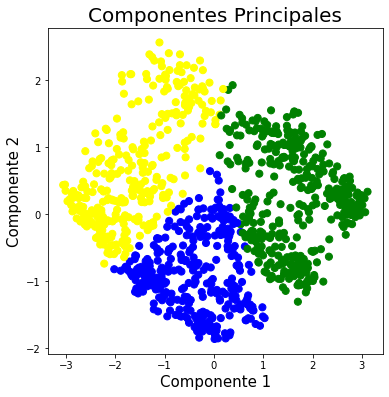

In [17]:
fig = plt.figure(figsize = (6, 6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1',fontsize = 15)
ax.set_ylabel('Componente 2',fontsize = 15)
ax.set_title('Componentes Principales',fontsize = 20)

color_theme = np.array(["blue","green","yellow"])
ax.scatter(x=pca_nombre_datos.componente_1, y = pca_nombre_datos.componente_2,
           c=color_theme[pca_nombre_datos.Kmeans_Clusters], s=50)
plt.show()

In [35]:
#centroids_V = clustering.cluster_centers_
#centroids_V

array([[0.67568844, 0.67152782, 0.27724504, 0.14903982, 0.50057941,
        0.57594017, 0.8160726 , 0.67022269, 0.67486045, 0.20514334,
        0.18459304, 0.0490544 , 0.06060073, 0.59820897, 0.23900143,
        0.24765065],
       [0.21955717, 0.28725074, 0.13438504, 0.44773174, 0.53732811,
        0.66254207, 0.56183921, 0.29224575, 0.34294083, 0.02783096,
        0.03232686, 0.03988642, 0.05252319, 0.5431042 , 0.10669145,
        0.03180167]])

In [ ]:
#temp = pd.DataFrame(centroids_V)
#temp.to_csv("centroides.csv")